In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

/home/seb/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Loading

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)

## Models 
inspired by : 
https://github.com/Shreyas3108/house-price-prediction/blob/master/housesales.ipynb

In [5]:
clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
          learning_rate=0.1, loss='ls')

In [6]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [7]:
clf.score(x_test, y_test)

0.9205067661615338

In [8]:
clf = RandomForestRegressor(n_estimators=400, max_depth=5, min_samples_split=2)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.7907360966173519

## lets keep few interesting features :

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

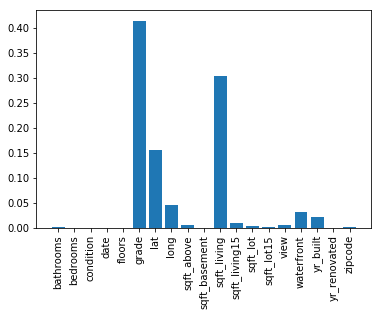

In [9]:
plt.bar(x_test.columns,clf.feature_importances_)
plt.xticks(rotation=90)

In [10]:
col_imp = ["grade", "lat", "long", "sqft_living", "waterfront", "yr_built"]

In [11]:
clf = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2)
clf.fit(x_train[col_imp], y_train)
clf.score(x_test[col_imp],y_test)

0.891573133649778

Keeping only few important columns decrease a bit the score

### Function who will be use in the flask server

In [13]:
def predict(dict_values,col_imp=col_imp, clf=clf):
    x = np.array([float(dict_values[col]) for col in col_imp])
    x = x.reshape(1,-1)
    y_pred = clf.predict(x)[0]
    return y_pred

In [17]:
x_test[col_imp].iloc[42].T.to_json()

'{"grade":10.0,"lat":47.5396,"long":-122.073,"sqft_living":4490.0,"waterfront":0.0,"yr_built":2006.0}'

In [14]:
x_test_json = {"grade":10.0,"lat":47.6307,
"long":-122.088,"sqft_living":2170.0,"waterfront":1.0,"yr_built":1979.0}

In [15]:
predict(x_test_json)

1447155.5590082589

I save an example just to try the example 

In [16]:
x_test[col_imp].iloc[42].T.to_json("../to_predict_json.json")